# Description

TODO

# Modules loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_FIGURE_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / "time_test"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [5]:
INPUT_DIR = conf.RESULTS_DIR / "time_test"
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [6]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [7]:
time_results.shape

(8440, 4)

In [8]:
time_results.head()

,data_size,method,time,sim
0,100,p-1,0.000636,-0.115117
1,100,p-1,0.000231,-0.050567
2,100,p-1,0.000383,0.215785
3,100,p-1,0.000319,0.020045
4,100,p-1,0.000437,0.053343


In [9]:
time_results["method"].unique()

array(['p-1', 's-1', 'cm-1', 'mic-1', 'p-3', 's-3', 'cm-3', 'mic-3'],
      dtype=object)

# Processing

In [10]:
time_results = time_results.replace(
    {
        "method": {
            "p-1": "Pearson (1 core)",
            "s-1": "Spearman (1 core)",
            "cm-1": "CCC (1 core)",
            "mic-1": "MIC (1 core)",
            "p-3": "Pearson (3 cores)",
            "s-3": "Spearman (3 cores)",
            "cm-3": "CCC (3 cores)",
            "mic-3": "MIC (3 cores)",
        }
    }
)

In [11]:
time_results.shape

(8440, 4)

In [12]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson (1 core),0.000636,-0.115117
1,100,Pearson (1 core),0.000231,-0.050567
2,100,Pearson (1 core),0.000383,0.215785
3,100,Pearson (1 core),0.000319,0.020045
4,100,Pearson (1 core),0.000437,0.053343


# Run numbers

In [13]:
plot_data = time_results  # [time_results["data_size"] >= 500]

In [14]:
run_numbers = plot_data.groupby(["data_size", "method"])["time"].describe()
display(run_numbers)

count       mean       std        min  \
data_size method                                                       
100       CCC (1 core)        1000.0   0.003710  0.000421   0.002508   
          CCC (3 cores)       1000.0   0.003542  0.000609   0.002872   
          MIC (1 core)        1000.0   0.003010  0.000208   0.002575   
          MIC (3 cores)       1000.0   0.003469  0.000330   0.002772   
          Pearson (1 core)    1000.0   0.000079  0.000039   0.000062   
          Pearson (3 cores)   1000.0   0.000091  0.000032   0.000066   
          Spearman (1 core)   1000.0   0.000447  0.000068   0.000412   
          Spearman (3 cores)  1000.0   0.000528  0.000097   0.000419   
500       CCC (1 core)          10.0   0.005987  0.000187   0.005709   
          CCC (3 cores)         10.0   0.004925  0.000766   0.003986   
          MIC (1 core)          10.0   0.046226  0.003265   0.042793   
          MIC (3 cores)         10.0   0.049948  0.001890   0.047017   
          Pearson (1 core)      10.0   0.000082  0.000019   0.000066   
          Pearson (3 cores)     10.0   0.000083  0.000012   0.000072   
          Spearman (1 core)     10.0   0.000550  0.000073   0.000490   
          Spearman (3 cores)    10.0   0.000610  0.000096   0.000535   
1000      CCC (1 core)          10.0   0.011192  0.000983   0.009629   
          CCC (3 cores)         10.0   0.007026  0.000534   0.006073   
          MIC (1 core)          10.0   0.134945  0.007211   0.128702   
          MIC (3 cores)         10.0   0.197101  0.035714   0.152836   
          Pearson (1 core)      10.0   0.000074  0.000008   0.000070   
          Pearson (3 cores)     10.0   0.000099  0.000028   0.000077   
          Spearman (1 core)     10.0   0.000603  0.000075   0.000556   
          Spearman (3 cores)    10.0   0.000702  0.000091   0.000628   
5000      CCC (1 core)          10.0   0.050882  0.005271   0.044040   
          CCC (3 cores)         10.0   0.024470  0.002186   0.022335   
          MIC (1 core)          10.0   1.659988  0.092347   1.548927   
          MIC (3 cores)         10.0   1.780787  0.066017   1.726806   
          Pearson (1 core)      10.0   0.000102  0.000016   0.000092   
          Pearson (3 cores)     10.0   0.000130  0.000029   0.000105   
          Spearman (1 core)     10.0   0.001312  0.000117   0.001117   
          Spearman (3 cores)    10.0   0.001437  0.000221   0.001273   
10000     CCC (1 core)          10.0   0.088035  0.003254   0.085421   
          CCC (3 cores)         10.0   0.046904  0.004826   0.044204   
          MIC (1 core)          10.0   8.502117  2.861815   6.262207   
          MIC (3 cores)         10.0   6.865010  0.133076   6.668336   
          Pearson (1 core)      10.0   0.000141  0.000047   0.000115   
          Pearson (3 cores)     10.0   0.000173  0.000044   0.000126   
          Spearman (1 core)     10.0   0.001980  0.000115   0.001915   
          Spearman (3 cores)    10.0   0.002410  0.000218   0.002213   
100000    CCC (1 core)          10.0   1.266635  0.159049   1.118050   
          CCC (3 cores)         10.0   0.493088  0.012828   0.482153   
          Pearson (1 core)      10.0   0.002834  0.000835   0.002021   
          Pearson (3 cores)     10.0   0.002012  0.000798   0.001006   
          Spearman (1 core)     10.0   0.036235  0.006507   0.032540   
          Spearman (3 cores)    10.0   0.031381  0.003025   0.028488   
1000000   CCC (1 core)          10.0  15.155038  0.753912  14.302512   
          CCC (3 cores)         10.0   6.878873  0.077737   6.794439   
          Pearson (1 core)      10.0   0.015348  0.001186   0.013513   
          Pearson (3 cores)     10.0   0.015459  0.000846   0.014365   
          Spearman (1 core)     10.0   0.482582  0.008343   0.470313   
          Spearman (3 cores)    10.0   0.397964  0.022290   0.378316   

                                    25%        50%        75%        max  
data_size method                                                   

# Plot#

In [15]:
hue_order = None  # ["CCC", "MIC", "Pearson", "Spearman"]

In [16]:
deep_colors = sns.color_palette("deep")
display(deep_colors)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [17]:
# colors = {
#     "CCC": deep_colors[0],
#     "Pearson": deep_colors[1],
#     "Spearman": deep_colors[2],
# }

In [18]:
def format_data_size(x):
    if x < 1000:
        return f"{int(x)}"
    elif x < 1000000:
        return f"{int(x/1000)}k"

    return f"{int(x/1000000)}m"


plot_data = plot_data.assign(data_size=plot_data["data_size"].apply(format_data_size))

## First analysis

Here I take a look if using more than 1 core benefits methods.

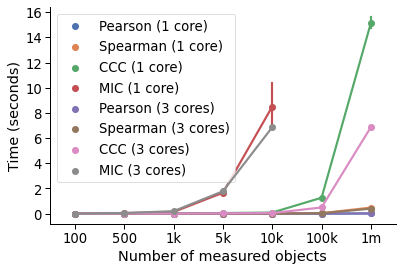

In [19]:
with sns.plotting_context("paper", font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        legend=False,
    )
    sns.despine()
    plt.legend(loc="best")
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")
    plt.tight_layout()
    # plt.savefig(
    #     OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
    #     bbox_inches="tight",
    #     facecolor="white",
    # )
    # ax.set_yscale('log')

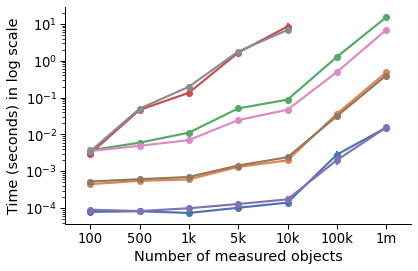

In [20]:
with sns.plotting_context("paper", font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        legend=False,
    )
    sns.despine()
    plt.legend([], [], frameon=False)
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")
    plt.tight_layout()
    # plt.savefig(
    #     OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
    #     bbox_inches="tight",
    #     facecolor="white",
    # )
    ax.set_yscale("log")

Only CCC is really taking advantage of more than 1 core, so I'll remove the rest below.

# Final analysis

In [25]:
plot_data = plot_data.replace(
    {
        "method": {
            "Pearson (3 cores)": "Pearson",
            "Spearman (3 cores)": "Spearman",
            "MIC (3 cores)": "MIC",
        }
    }
)

In [26]:
plot_data["method"].unique()

array(['Pearson (1 core)', 'Spearman (1 core)', 'CCC (1 core)',
       'MIC (1 core)', 'Pearson', 'Spearman', 'CCC (3 cores)', 'MIC'],
      dtype=object)

In [32]:
hue_order = ["MIC", "CCC (1 core)", "CCC (3 cores)", "Spearman", "Pearson"]

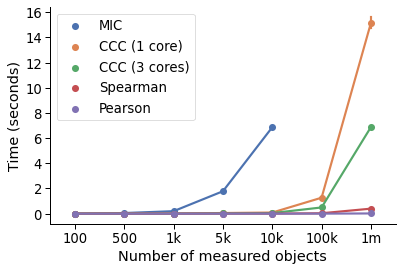

In [33]:
with sns.plotting_context("paper", font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        legend=False,
    )
    sns.despine()
    plt.legend(loc="best")
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")
    plt.tight_layout()
    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
        bbox_inches="tight",
        facecolor="white",
    )

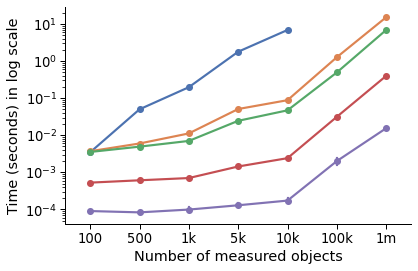

In [34]:
with sns.plotting_context("paper", font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        legend=False,
    )
    sns.despine()
    plt.legend([], [], frameon=False)
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")
    plt.tight_layout()
    ax.set_yscale("log")
    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
        bbox_inches="tight",
        facecolor="white",
    )